Exploratory Data Analysis

In [50]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
sd = dataset['train'].to_pandas()

sd['job_posted_date'] = pd.to_datetime(sd['job_posted_date'])
sd['job_skills'] = sd['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [51]:
sd_DA_in = sd[(sd['job_country'] == 'India') & (sd['job_title_short'] == 'Data Analyst')]

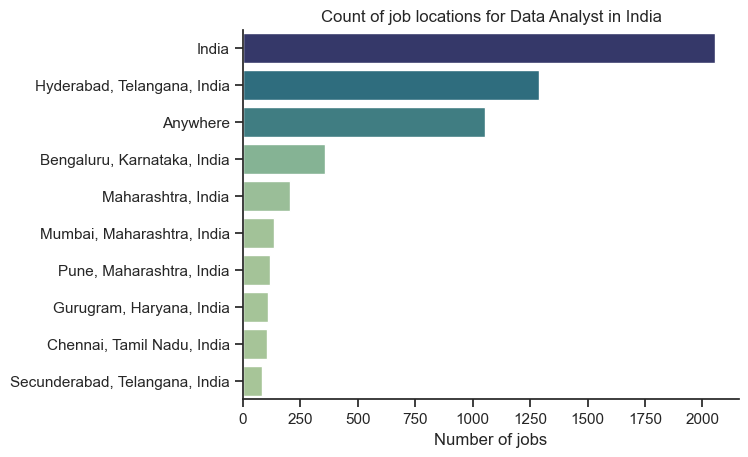

In [52]:
sd_plot = sd_DA_in['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=sd_plot, x='count', y='job_location', hue='count', palette='crest', legend=False)
sns.despine()
plt.title('Count of job locations for Data Analyst in India')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

In [58]:
sd_DA_in['job_work_from_home'].value_counts()

job_work_from_home
False    5069
True     1052
Name: count, dtype: int64

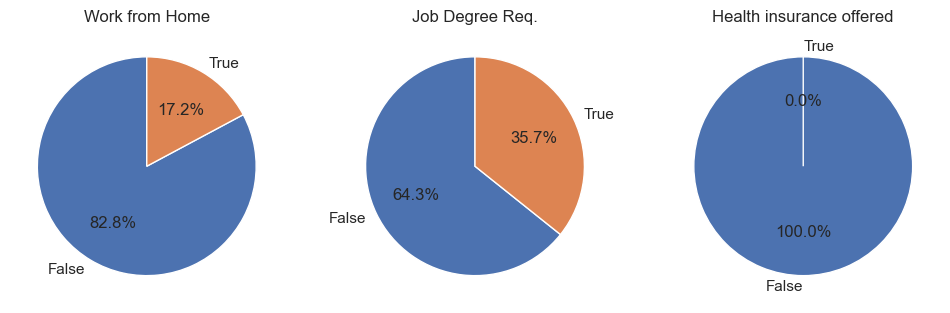

In [60]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))


dict_column = {
        'job_work_from_home' : 'Work from Home',
        'job_no_degree_mention' : 'Job Degree Req.',
        'job_health_insurance' : 'Health insurance offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(sd_DA_in[column].value_counts().reindex([False, True], fill_value=0), startangle= 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()

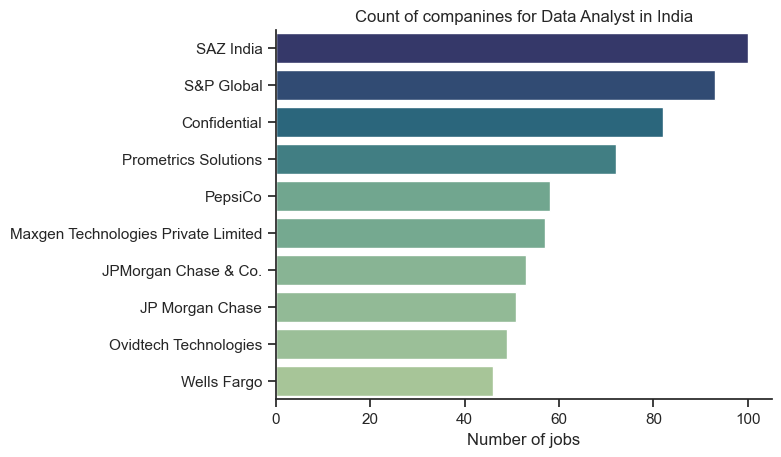

In [63]:
sd_plot = sd_DA_in['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=sd_plot, x='count', y='company_name', hue='count', palette='crest', legend=False)
sns.despine()
plt.title('Count of companines for Data Analyst in India')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()